# **"VAMOS PASSAR LÁ NA BEMOL? O ÔNIBUS SE CHAMA PYTHON!"**

Hello, world! Sou Vitor Vieira, economista pela UFAM (2023), com experiência profissional no comércio manauara. Estou aqui para lhes guiar num passeio pelo varejo amazonense a partir do Python!


Temos algumas questões para responder, mas antes precisamos padronizar o banco de dados. Para tal, trouxemos do Excel dois arquivos originários do banco de dados dado pela empresa: desafio_original.csv e vendedores.csv.

Primeiramente, devemos carregar os arquivos de interesse e bilbiotecas no Python.


In [ ]:
# -*- coding: utf-8 -*-
"""
por: Vitor Vieira (vitorhfv2@gmail.com)
"""
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv("desafio_original.csv")
vendedores = pd.read_csv('vendedores.csv')


Podemos ver algumas informações do dataframe a partir dos comandos "head" e "tail". Façamos com o segundo, que detalha as informações do "rabo" do dataframe.

In [ ]:
df.tail(10)

,Centro,Unidade,Produto,Valor unitário,Cod_vendedorr,Qtd,Data_compra
890,104.0,Nova cidade,Sofá,"R$ 1.550,00",34535.0,16,4/14/2021
891,102.0,Cidade Nova,Cama,"R$ 1.300,00",55354.0,16,6/4/2021
892,104.0,Matriz,Berço,"R$ 690,00",141000.0,7,7/3/2021
893,101.0,Amazonas Shopping,Notebook,"R$ 3.115,00",17988.0,11,1/4/2021
894,102.0,Cidade Nova,Bicicleta,"R$ 1.200,00",55354.0,10,6/19/2021
895,106.0,Avenida,Bebedouro,"R$ 550,00",2592.0,3,9/21/2021
896,101.0,Eduardo Gomes,Mouse,"R$ 47,00",11022.0,9,2/27/2021
897,104.0,Amazonas Shopping,Powerbank,"R$ 120,00",5657.0,15,6/11/2021
898,106.0,Amazonas Shopping,Brinquedos,"R$ 400,00",17988.0,10,7/6/2021
899,NaN,NaN,NaN,"R$ 1.292.291,00",NaN,9403,NaN


Percebe-se que a última linha carrega somente somas em relação às linhas anteriores. Podemos descartá-la e, caso seja de nosso interesse, refazê-las com o Python. Como tal, identificamos as linhas com valores nulos, de modo a descartamos somente a última linha.

In [ ]:
df.isnull().sum()
df = df.drop(df.index[-1])

Agora vamos buscar por padrões que possam ser padronizados nas colunas "Unidade" e "Produto".

In [ ]:
df['Unidade'].value_counts()

Unidade
Eduardo Gomes        168
Avenida              158
Matriz               148
Nova cidade          147
Cidade Nova          146
Amazonas Shopping    129
Ammazonas Shoping      3
Name: count, dtype: int64

In [ ]:
df['Produto'].value_counts()

Produto
Mi Band 6          48
Bebedouro          43
Sofá               42
Fogão              41
Jogo de Panela     41
Geladeira          40
Teclado            39
Iphone             38
Mouse              37
Televisão          37
Brinquedos         37
Powerbank          36
Berço              36
Xbox series s      35
Bicicleta          34
Guarda Roupa       34
Cadeira Gamer      34
Monitor            34
Cama               34
Microondas         33
Samsung            32
Notebook           31
Ar condicionado    30
Fone de Ouvido     27
Ar_condicionado    10
Cadeira%Gamer       5
Fone d Ouvido       4
samsungsamsung      3
XBOX SERIESSSS      1
IPHOne              1
SAMSUNG             1
iPHONE              1
Name: count, dtype: int64

É possível, sim, notarmos alguns padrões! O Amazonas Shopping aparece duplicado na coluna Unidade, enquanto um mesmo ítem aparece com diversas grafias em Produto.

Você sabia que podemos utilizar algoritmo de machine learning para resolver este problema? Clique [aqui](https://medium.com/bemol/aprimorando-a-an%C3%A1lise-de-dados-textuais-atrav%C3%A9s-de-compara%C3%A7%C3%B5es-de-strings-beff708326f8) para ver um tutorial e saber mais.

Como desejamos utilizar somente as bibliotecas nativas do Python, vamos utilizar o regex de modo a padronizar, individualmente, cada coluna. Vejamos abaixo.

> *Em ciência da computação, uma expressão regular (regex) provê uma forma concisa e flexível de identificar cadeias de caracteres de interesse, como caracteres particulares, palavras ou padrões de caracteres.* (Wikipedia)



In [ ]:
df[["Unidade"]].value_counts()
df['Unidade'] = df['Unidade'].replace({'Ammazonas Shoping': 'Amazonas Shopping'}, regex=True)
df['Unidade'] = df['Unidade'].str.title() # A a cada palavra a primeira letra fica maiúscula.
df[["Produto"]].value_counts()
df['Produto'] = df['Produto'].replace(r'[%_]', ' ', regex=True) # Troca caracteres especiais por espaço simples.
df['Produto'] = df['Produto'].str.title() # A a cada palavra a primeira letra fica maiúscula.
df['Produto'] = df['Produto'].replace({'Ar Condicionado': 'Ar-condicionado'}, regex=True)
df['Produto'] = df['Produto'].replace({'Fone D Ouvido': 'Fone De Ouvido'}, regex=True)
df['Produto'] = df['Produto'].replace({'Samsungsamsung': 'Samsung'}, regex=True)
df['Produto'] = df['Produto'].replace({'Xbox Seriessss': 'Xbox Series S'}, regex=True)
df[["Produto"]].value_counts()

Produto        
Mi Band 6          48
Bebedouro          43
Sofá               42
Jogo De Panela     41
Fogão              41
Iphone             40
Geladeira          40
Ar-condicionado    40
Cadeira Gamer      39
Teclado            39
Brinquedos         37
Mouse              37
Televisão          37
Powerbank          36
Samsung            36
Berço              36
Xbox Series S      36
Cama               34
Guarda Roupa       34
Bicicleta          34
Monitor            34
Microondas         33
Fone De Ouvido     31
Notebook           31
Name: count, dtype: int64

Pronto! Agora ambas as colunas estão padronizadas! Mas é possível que tenhamos que padronizar a coluna de Valor. Façamos isso com uma função lambda. Vamor retirar o "R$" de modo a deixar a coluna somente com valores númericos.

In [ ]:
df.dtypes

Centro            float64
Unidade            object
Produto            object
Valor unitário     object
Cod_vendedorr     float64
Qtd                 int64
Data_compra        object
dtype: object

In [ ]:
df['Valor unitário'] = df['Valor unitário'].apply(lambda x: re.sub(r'^R\$ |[.,]', '', x))
df['Valor unitário'] = pd.to_numeric(df['Valor unitário']) / 100

Criemos, agora, uma nova coluna de valor total:

In [ ]:
df['Qtd'] = pd.to_numeric(df['Qtd'])
df['valor_total'] = df['Valor unitário'] * df['Qtd'] # criamos nova coluna.
df['Data_compra'] = pd.to_datetime(df['Data_compra'], format='%m/%d/%Y', errors='coerce')

In [ ]:
df

,Centro,Unidade,Produto,Valor unitário,Qtd,valor_total,Data_compra,Cod_vendedor,Vendedor
0,101.0,Avenida,Brinquedos,400.0,17,6800.0,2021-04-25,49590,Cintia
1,103.0,Cidade Nova,Berço,690.0,14,9660.0,2021-03-24,55354,Anderson
2,106.0,Avenida,Fogão,1834.0,3,5502.0,2021-03-31,19231,Cristina
3,104.0,Avenida,Powerbank,120.0,5,600.0,2021-06-16,19231,Cristina
4,104.0,Amazonas Shopping,Mi Band 6,400.0,20,8000.0,2022-02-24,15176,Larissa
...,...,...,...,...,...,...,...,...,...
894,102.0,Cidade Nova,Bicicleta,1200.0,10,12000.0,2021-06-19,55354,Anderson
895,106.0,Avenida,Bebedouro,550.0,3,1650.0,2021-09-21,2592,Miqueias
896,101.0,Eduardo Gomes,Mouse,47.0,9,423.0,2021-02-27,11022,Cléberson
897,104.0,Amazonas Shopping,Powerbank,120.0,15,1800.0,2021-06-11,5657,Vanessa


Só por questões estilísticas, vamos colocar a a coluna de data ao final de dataframe?

In [ ]:
colunas = df.columns.tolist()
colunas.remove('Data_compra')
colunas.append('Data_compra')
df = df[colunas]
df

,Centro,Unidade,Produto,Valor unitário,Cod_vendedorr,Qtd,valor_total,Data_compra
0,101.0,Avenida,Brinquedos,400.0,49590.0,17,6800.0,2021-04-25
1,103.0,Cidade Nova,Berço,690.0,55354.0,14,9660.0,2021-03-24
2,106.0,Avenida,Fogão,1834.0,19231.0,3,5502.0,2021-03-31
3,104.0,Avenida,Powerbank,120.0,19231.0,5,600.0,2021-06-16
4,104.0,Amazonas Shopping,Mi Band 6,400.0,15176.0,20,8000.0,2022-02-24
...,...,...,...,...,...,...,...,...
894,102.0,Cidade Nova,Bicicleta,1200.0,55354.0,10,12000.0,2021-06-19
895,106.0,Avenida,Bebedouro,550.0,2592.0,3,1650.0,2021-09-21
896,101.0,Eduardo Gomes,Mouse,47.0,11022.0,9,423.0,2021-02-27
897,104.0,Amazonas Shopping,Powerbank,120.0,5657.0,15,1800.0,2021-06-11


In [ ]:
df.dtypes

Centro                   float64
Unidade                   object
Produto                   object
Valor unitário           float64
Cod_vendedorr            float64
Qtd                        int64
valor_total              float64
Data_compra       datetime64[ns]
dtype: object

Podemos dividir o dataframe por ano, para facilitar nossa vida, uma vez que só  há valores para 2021 e 2022.
Além disso, podemos criar um novo dataframe de modo a mostrar os produtos mais vendidos pela BEMOL.

In [ ]:
df_2021 = df[df['Data_compra'].dt.year == 2021]
df_2022 = df[df['Data_compra'].dt.year == 2022]
novo_df = df.groupby('Produto')['Qtd'].sum().reset_index()

Pronto! Terminamos a preparação de dados! Agora podemos responder às perguntas.

 # **Qual o imposto total a ser pago pela empresa?**

Primeiramente, calculamos o faturamento da empresa e depois recriamos a tabela de impostos oriunda da base de dados original.

(até poderíamos importar o dataframe de impostos como uma terceira tabela, mas como como fomos picados pela cobra do Python e estamos aqui para programar, façamos o mais difícil!)

In [ ]:
soma_total = df['valor_total'].sum()

imposto = {
    'aliquota': ['0.05', '0.12', '0.17'],
    'Faixas de Receita': ['Até R$ 2.100.000,00',
                          'De R$ 2.100.000,01 A R$ 2.400.000,00',
                          'A partir de R$ 2.400.000,01']
    }

In [ ]:
imposto = pd.DataFrame(imposto)
soma_impost = soma_total * float(imposto.iloc[2]['aliquota'])
soma_qtd = novo_df['Qtd'].sum()
imposto_por_unidade = soma_impost / soma_qtd
soma_impost

2304716.8600000003

Pronto! Temos resposta para a primeira pergunta!

O total a ser pago em impostos pela empresa é R$ 2.304.716,86.

Mas queremos jogar esse game no modo mais difícil! Quais outras perguntas em relação a impostos podemos responder?
Façamos, então, a relação de impostos por unidade ano a ano.

In [ ]:
soma_total_2021 = df_2021['valor_total'].sum() # aliquota máxima:
soma_impost_21 = soma_total_2021 * float(imposto.iloc[2]['aliquota'])
soma_qtd_21 = df_2021['Qtd'].sum()
imposto_por_unidade_21 = soma_impost_21 / soma_qtd_21

soma_total_2022 = df_2022['valor_total'].sum()
soma_impost_22 = soma_total_2022 * float(imposto.iloc[0]['aliquota']) # 0,05 dado que é menor que 2 milhões.
soma_qtd_22 = df_2022['Qtd'].sum()
imposto_por_unidade_22 = soma_impost_22 / soma_qtd_22

In [ ]:
soma_impost_21+soma_impost_22 # Há uma alíquota para cada ano,
                              # o que explica a diferença em relação ao
                              # cálculo anterior (alíquota única).

2081784.9400000002

In [ ]:
data_maxima = df['Data_compra'].max()
data_maxima

Timestamp('2022-02-28 00:00:00')

Como vemos acima, os dados só vão até o fim de fevereiro de 2022.

# **Impostos centralizados ou descentralizados?**
A forma de cálculo acima deduz que os tributos são centralizados pela matriz.

E se cada unidade pagar por seus impostos, como fica?

Esse sistema é o de descentralização tributária. Vamos testar um pouco.

> * "Na forma centralizada, a escrituração contábil (fechamento do balanço patrimonial, balancete e DRE) é toda feita na empresa matriz. Todavia, executando de maneira descentralizada, a escrituração contábil é feita em cada unidade e somente no final do período é que é feita a combinação dessas informações sendo levantados dados por cada unidade." (Conube)

Como para o ano de 2022 os dados estão incompletos, façamos somente para 2021, visto que impostos são pagos anualmente. Criemos novamente as alíquotas, baseando-se na base de dados original dada pela empresa por faixa de receita.

In [ ]:
imposto_descent_unid21 = df_2021.groupby('Unidade')['valor_total'].sum().reset_index()
aliquotas = [0.05, 0.05, 0.05, 0.17, 0.05, 0.05]

# Qual o imposto por unidade?

In [ ]:
imposto_descent_unid21['aliquota'] = aliquotas
imposto_descent_unid21['aliquota'] = imposto_descent_unid21['aliquota'].astype(float)
imposto_descent_unid21['impostos'] = imposto_descent_unid21['valor_total'] * imposto_descent_unid21['aliquota']
imposto_descent_unid21 = imposto_descent_unid21.sort_values(by='valor_total', ascending=False)
imposto_descent_unid21


,Unidade,valor_total,aliquota,impostos
3,Eduardo Gomes,2646363.0,0.17,449881.71
5,Nova Cidade,1938837.0,0.05,96941.85
2,Cidade Nova,1862663.0,0.05,93133.15
1,Avenida,1791082.0,0.05,89554.10
4,Matriz,1785287.0,0.05,89264.35
0,Amazonas Shopping,1675160.0,0.05,83758.00


In [ ]:
soma_linha = imposto_descent_unid21.select_dtypes(include='number').sum().to_frame().T
soma_linha['Unidade'] = 'Total'
imposto_descent_unid21 = pd.concat([imposto_descent_unid21, soma_linha], ignore_index=True)
imposto_descent_unid21


,Unidade,valor_total,aliquota,impostos
0,Eduardo Gomes,2646363.0,0.17,449881.71
1,Nova Cidade,1938837.0,0.05,96941.85
2,Cidade Nova,1862663.0,0.05,93133.15
3,Avenida,1791082.0,0.05,89554.10
4,Matriz,1785287.0,0.05,89264.35
5,Amazonas Shopping,1675160.0,0.05,83758.00
6,Total,11699392.0,0.42,902533.16


Nesse caso, a unidade que mais paga impostos é a Eduardo Gomes! São cerca de R$ 450.000,00 aproximadamente!

# Qual o produto mais vendido?

In [ ]:
produtos_mais_vendidos = novo_df.sort_values(by='Qtd', ascending=False)
produtos_mais_vendidos.head()

,Produto,Qtd
12,Jogo De Panela,498
13,Mi Band 6,491
11,Iphone,484
4,Brinquedos,474
1,Bebedouro,454


O produto mais vendido por quantidade foi o jogo de panelas! Nada mal, hein?

# Qual a proporção de cada produto no faturamento da empresa?

Podemos respondê-la com um gráfico! Já estamos evoluindo!

In [ ]:
novo_df_qtd = df.groupby('Produto')['valor_total'].sum().reset_index()
novo_df_qtd['proporcao'] = novo_df_qtd['valor_total'] / novo_df_qtd['valor_total'].sum()
novo_df_qtd = novo_df_qtd.sort_values(by='proporcao', ascending=False)
novo_df_qtd

,Produto,valor_total,proporcao
11,Iphone,3630000.0,0.267755
9,Geladeira,1289088.0,0.095085
23,Xbox Series S,854000.0,0.062993
22,Televisão,814320.0,0.060066
17,Notebook,797440.0,0.058821
7,Fogão,794122.0,0.058576
0,Ar-condicionado,741200.0,0.054672
20,Sofá,654100.0,0.048248
19,Samsung,598400.0,0.044139
5,Cadeira Gamer,465600.0,0.034343


Acima vemos a proporção de cada produto sobre o faturamento da empresa. É uma resposta que procuravámos Façamos um gráfico para o Top 4.

# Gráfico 1: Proporção de produto por faturamento


In [ ]:
novo_df_qtd = novo_df_qtd.head(4)
novo_df_qtd

,Produto,valor_total,proporcao
11,Iphone,3630000.0,0.267755
9,Geladeira,1289088.0,0.095085
23,Xbox Series S,854000.0,0.062993
22,Televisão,814320.0,0.060066


<ipython-input-351-bdd08e6aec55>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # Configurar o estilo!


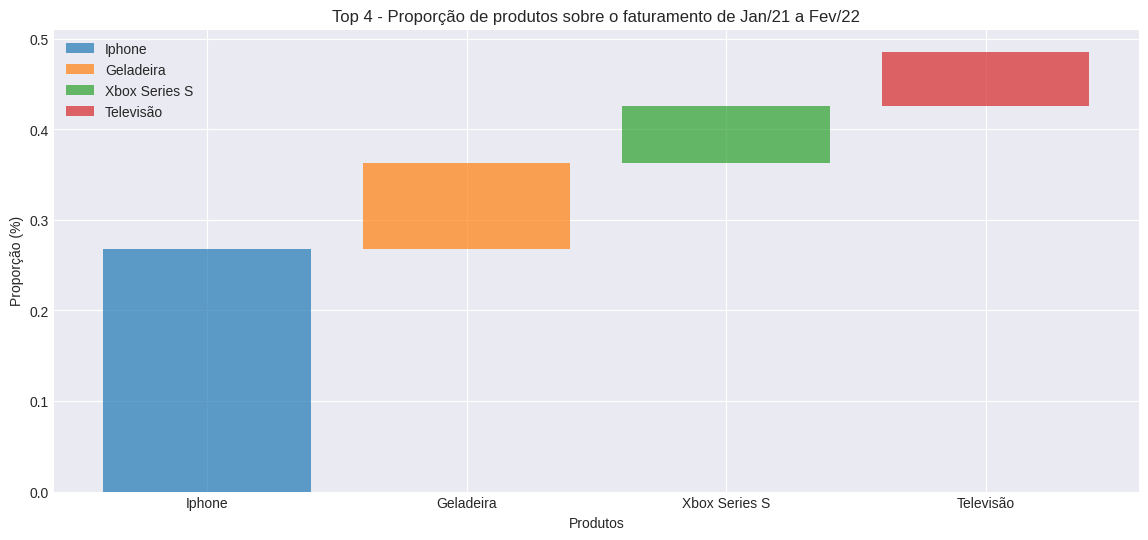

In [ ]:
# Gráfico 1:
# Qual a proporção dos produtos mais vendidos sobre o faturamento?

plt.style.use('seaborn-darkgrid') # Configurar o estilo!
plt.figure(figsize=(14, 6), dpi=100)
bottom = 0

for i in range(4): # O iteramento necessário
    label = novo_df_qtd['Produto'].iloc[i]
    plt.bar(label, novo_df_qtd['proporcao'].iloc[i], bottom=bottom, label=label, alpha=0.7)
    bottom += novo_df_qtd['proporcao'].iloc[i]

plt.xlabel('Produtos') # Detalhes do gráfico em si com o matplotlib
plt.ylabel('Proporção (%)')
plt.title('Top 4 - Proporção de produtos sobre o faturamento de Jan/21 a Fev/22')
plt.legend()
plt.show()

Olha que legal! Não é que o visionário Steve Jobs estava correto lá atrás? O IPhone é o produto mais proporcionalmente vendido pela BEMOL, seguido por geladeira, Xbox Series S e Televisão.

Destaquemos a posição do [Xbox](https://www.bemol.com.br/pesquisa?t=xbox), vendido em Manaus a um preço mais em conta em relação às redes varejistas do sudeste.

# Qual o lucro de cada unidade após impostos?

Podemos seguir em frente? Qual o lucro de cada unidade após descontarmos os impostos?

Não é possível calcularmos o lucro de cada loja, haja visto que os dados não fornecem  informações a respeito das despesas da empresa. Assim, calcula-se a receita líquida a partir do faturamento, deduzindo-o de impostos. Como 2021 é o único ano completo da base de dados, usaremos somente ele.



> *O que é o ano fiscal? Em resumo, o ano fiscal é um período de tempo usado para fins contábeis, durante o qual as empresas registram suas atividades financeiras. O ano fiscal começa em 1º de janeiro e termina em 31 de dezembro. (Onlineapp).*




In [ ]:
imposto_descent_unid21['receita_liquida'] = imposto_descent_unid21['valor_total'] - imposto_descent_unid21['impostos']
imposto_descent_unid21

,Unidade,valor_total,aliquota,impostos,receita_liquida
0,Eduardo Gomes,2646363.0,0.17,449881.71,2196481.29
1,Nova Cidade,1938837.0,0.05,96941.85,1841895.15
2,Cidade Nova,1862663.0,0.05,93133.15,1769529.85
3,Avenida,1791082.0,0.05,89554.10,1701527.90
4,Matriz,1785287.0,0.05,89264.35,1696022.65
5,Amazonas Shopping,1675160.0,0.05,83758.00,1591402.00
6,Total,11699392.0,0.42,902533.16,10796858.84


# Qual o faturamento por unidade, total de impostos e receita líquida?
Olha que legal! O faturamento da unidade Eduardo Gomes se manteve acima de R$ 2 milhões!

E, além disso, há o total a ser pago de impostos por cada unidade, descentralizada: R$ 902.533,16!

Já o total faturado, se considerarmos que os impostos são deduzidos por cada unidade, foi de R$ 11.699.392,0 milhões!

Portanto, o faturamento líquido é de R$ 10.796.858,84 milhões!

São respostas para a questão um!


# Qual o dia em que houve mais compras em cada unidade?
Vamos a mais uma pergunta! Qual o período que mais houve compras na BEMOL para o período delimitado? Nós vamos agrupar o dataframe original (df), para ambos os anos, e agrupar por valor total a cada unidade da empresa.

In [ ]:
soma_por_data_unidade = df.groupby(['Data_compra', 'Unidade'])['valor_total'].sum().reset_index()
idx_max_dia = soma_por_data_unidade.groupby('Unidade')['valor_total'].idxmax()
unid_dia_mais_vendas = soma_por_data_unidade.loc[idx_max_dia]
unid_dia_mais_vendas = unid_dia_mais_vendas.sort_values(by='valor_total', ascending=False)
unid_dia_mais_vendas

,Data_compra,Unidade,valor_total
158,2021-03-26,Amazonas Shopping,159000.0
425,2021-08-22,Nova Cidade,156050.0
14,2021-01-08,Avenida,155230.0
731,2022-02-04,Cidade Nova,154000.0
596,2021-11-28,Eduardo Gomes,137150.0
568,2021-11-13,Matriz,135000.0


O dia em que uma unidade da Bemol mais vendeu foi em 3 de março de 2021!
Acima, vemos o dia mais lucrativo para cada unidade.

# Qual o mês em que mais houve compras em cada unidade?

 Se quisermos saber o mês em que cada unidade mais faturou? Vejamos abaixo!

In [ ]:
df['Mes'] = df['Data_compra'].dt.to_period('M')
soma_por_mes_unidade = df.groupby(['Mes', 'Unidade'])['valor_total'].sum().reset_index()
idx_max_mes = soma_por_mes_unidade.groupby('Unidade')['valor_total'].idxmax()

mes_unidade_mais_vendas = soma_por_mes_unidade.loc[idx_max_mes]
mes_unidade_mais_vendas = mes_unidade_mais_vendas.sort_values(by='valor_total', ascending=False)
mes_unidade_mais_vendas

<ipython-input-354-8c1bcce96b65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mes'] = df['Data_compra'].dt.to_period('M')


,Mes,Unidade,valor_total
63,2021-11,Eduardo Gomes,444556.0
12,2021-03,Amazonas Shopping,371271.0
8,2021-02,Cidade Nova,348218.0
25,2021-05,Avenida,340133.0
29,2021-05,Nova Cidade,287775.0
16,2021-03,Matriz,262073.0


Legal! A unidade Eduardo Gomes foi a que mais faturou! Isso em novembro de 2021! Os números são ótimos para o mês que antecede o Natal, data marcante para o comércio. Fevereiro, março e maio de 2021 também marcam presença.

Lembremos que o início de 2021 foi o período de uma terrível onda de covid-19 a acometer o estado do Amazonas. Os números ilustram a recuperação do comércio manauara para o periódo a seguir.



> [Bastidores Bemol na Pandemia 2020](https://www.linkedin.com/pulse/bastidores-bemol-na-pandemia-2020-jo%C3%A1s-ferreira/)

# Qual foi a unidade mais rentável em 2021?
Podemos prosseguir a explorar os dados. Qual a unidade da Bemol mais vende produtos? Façamos para 2021, o único ano completo presente.

In [ ]:
vendas_por_unidade = df.groupby('Unidade')['valor_total'].sum()
unidade_mais_vendida = vendas_por_unidade.idxmax()
vendas_por_unidade_2021 = df_2021.groupby('Unidade')['valor_total'].sum()
unidade_mais_vendida_2021 = vendas_por_unidade_2021.idxmax()
unidade_mais_vendida_2021

'Eduardo Gomes'

Nenhuma surpresa! Em consonância com as demais respostas, a unidade que leva o nome do brigadeiro presidenciável leva mais uma.
Foi a unidade que mais produtos vendeu em 2021!


---



# Vamos falar dos vendedores!

Para dar uma pausa nos códigos, como alguém que cresceu no Amazonas, a gente não pode deixar de falar de boi. Você é Garantido ou Caprichoso? O escritor deste artigo é Garantido! Solta o play no vídeo abaixo e descanse antes de voltarmos à análise!

[TRANSCENDÊNCIA KANAMARI | Álbum Boi Garantido 2024](https://www.youtube.com/watch?v=l7NdJdqf2_U) (Youtube)

A base de dados do Excel apresenta uma relação de vendedores. Podemos continuar a explorá-la. E se quisermos saber qual o melhor vendedor da empresa?

Se você notar abaixo, há uma letra R a mais em "cod_vendedorr". Teremos de ajeitar!
Além disso, adicionaremos as colunas de vendedores (vendedores.csv) ao dataframe inicial (df) a partir da função merge do Pandas.

In [ ]:
cod_melhores_vend = vendedores.set_index('Cod_vendedor')['Vendedor']
df['Cod_vendedor'] = df['Cod_vendedorr'].astype(int) #  padroniza-se o tipo de entrada
cod_melhores_vend.index = cod_melhores_vend.index.astype(int)
df = pd.merge(df, cod_melhores_vend.reset_index(), # transforma em uma só coluna ambos os DF.
                           left_on='Cod_vendedor',
                           right_on='Cod_vendedor',
                           how='left')

melhores_vendedores = df.groupby('Vendedor')['valor_total'].sum()

<ipython-input-356-69404a9811af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cod_vendedor'] = df['Cod_vendedorr'].astype(int) #  padroniza-se o tipo de entrada


# Quem é o melhor vendedor da empresa?

Agore transformemos em dataframe e coloquemos em ordem crescente.

Assim, abaixo temos os melhores vendedores da loja para o período relatado pela base de dados.

In [ ]:
melhores_vendedores.dtype

dtype('float64')

In [ ]:
melhores_vendedores_df = pd.DataFrame(melhores_vendedores)
df_ordem = melhores_vendedores_df.sort_values(by='valor_total', ascending=False)
df_ordem

,valor_total
Vendedor,
Raimundo,1085592.0
Katia,707620.0
Marcelo,689152.0
Guilherme,617321.0
Morgana,593103.0
Larissa,591871.0
Cristiano,585320.0
Pedro,570010.0
Cintia,550343.0


O melhor vendedor da Bemol para o período delimitado foi Raimundo!

# Gráfico 2: Os produtos mais vendidos pela Bemol - 21/22
Terminamos! Mas, só para deixar a coisa mais completa, podemos utilizar alguns gráficos. Gráficos são excelentes formas de mostramos conclusões importantes de forma simples e concisa.

Vejamos um gráfico dos produtos mais vendidos. E de azul, a cor da BEMOL!

Text(0.5, 1.0, 'Produtos Mais Vendidos - Jan/21 a Fev/22')

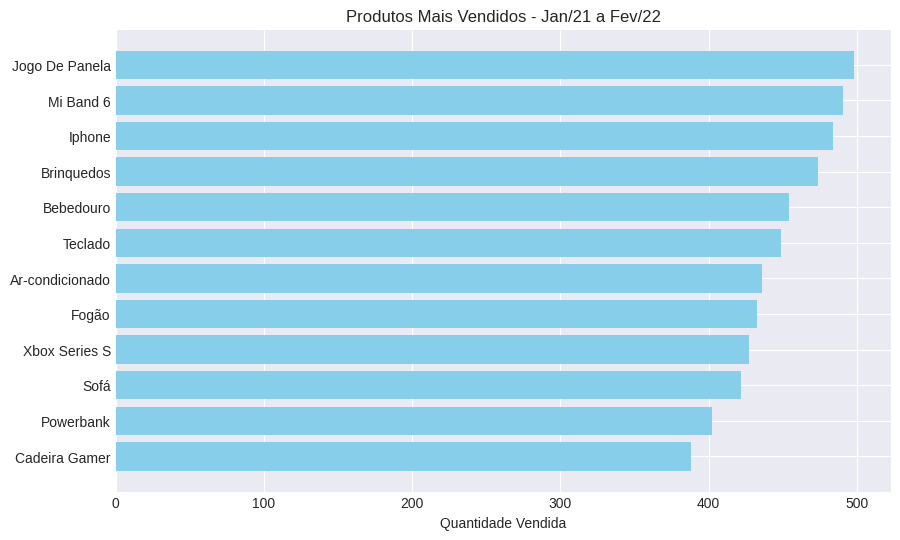

In [ ]:
# Gráfico 2
top_produtos = produtos_mais_vendidos.loc[:5, :]
plt.figure(figsize=(10, 6), dpi=100)
plt.barh(top_produtos['Produto'][::-1], top_produtos['Qtd'][::-1], color='skyblue') # Em forma crescente, cor azul
plt.xlabel('Quantidade Vendida')
plt.title('Produtos Mais Vendidos - Jan/21 a Fev/22')

Olha só que legal! Chama atenção a quantidade de fogões vendidos pela empresa, irmã da marca de botijões a gás FOGÁS. Fogão e gás podem ser considerados bens complementares, ou seja, o aumento de venda do fogão aumenta a demanda por botijas. Você sabia desse conceito?

E se quisermos mostrar num gráfico o faturamento por unidade da Bemol?

# Gráfico 3: Faturamento por unidade - 21/22

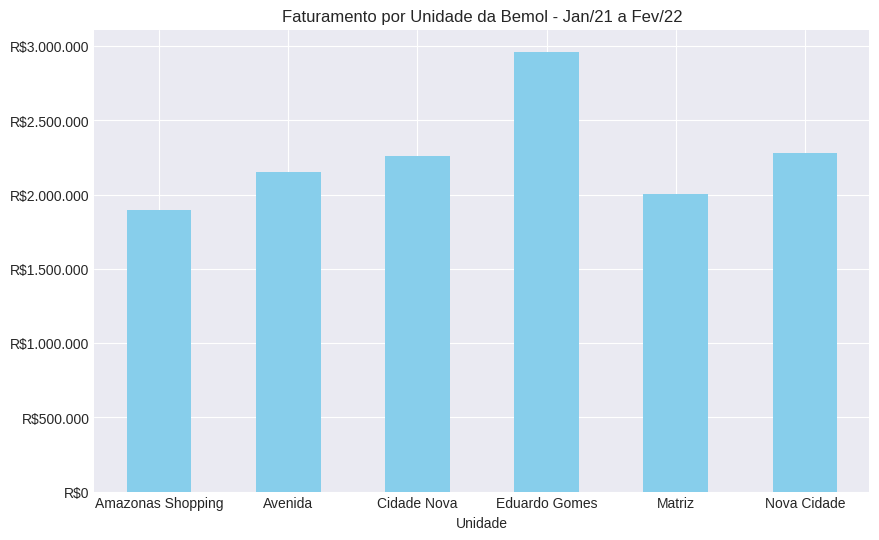

In [ ]:
# Função (valor monetário no eixo das abcissas y)

def formatar_valor_monetario(valor, _):
    return "R${:,.0f}".format(valor).replace(",", ".")

# Gráfico 3

plt.figure(figsize=(10, 6), dpi=100)
vendas_por_unidade.plot(kind='bar', color='skyblue')
plt.xlabel('Unidade')
plt.title('Faturamento por Unidade da Bemol - Jan/21 a Fev/22')
plt.xticks(rotation=0)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(formatar_valor_monetario))
plt.show()

Muito bom! E, para encerrar, é possível que mostremos o faturamento ao longo do tempo por parte da empresa. Tem até ponto de máximo destacado em azul escuro. Olha só que bonito fica!

# Gráfico 4: Faturamento total em 2021

<ipython-input-361-cc699112f42c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Data_compra'] = pd.to_datetime(df['Data_compra'])
<ipython-input-361-cc699112f42c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Mes'] = df_2021['Data_compra'].dt.month


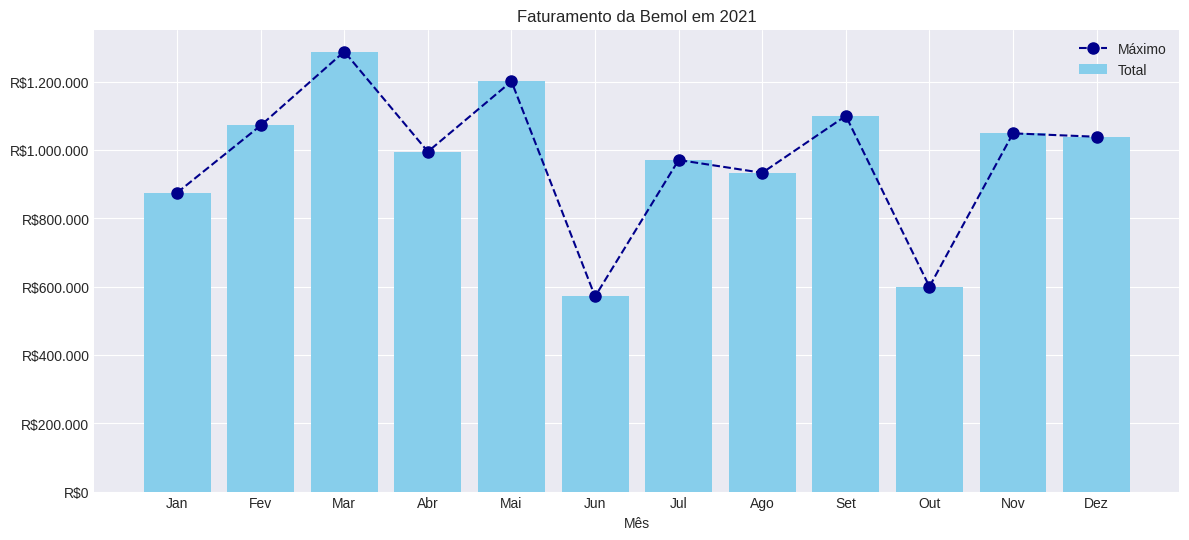

In [ ]:
## Gráfico 4:

df_2021['Data_compra'] = pd.to_datetime(df['Data_compra'])
df_2021['Mes'] = df_2021['Data_compra'].dt.month
soma_valores_por_mes = df_2021.groupby('Mes')['valor_total'].sum().reset_index()
plt.figure(figsize=(14, 6), dpi = 100)
bars = plt.bar(soma_valores_por_mes['Mes'], soma_valores_por_mes['valor_total'], color='skyblue', label='Total')

max_points = [bar.get_height() for bar in bars]
plt.plot(soma_valores_por_mes['Mes'], max_points, color='darkblue', linestyle='--', marker='o', markersize=8, label='Máximo')

plt.gca().get_yaxis().set_major_formatter(FuncFormatter(formatar_valor_monetario))
plt.title('Faturamento da Bemol em 2021')
plt.xlabel('Mês')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.show()

Olha que ótimo! O mês mais rentável da empresa em 2021 foi março, um tanto contraintuitivo, dado que se esperava que fosse dezembro.

# Gráfico 5: Faturamento de cada vendedor por unidade - 21/22
Agora, pra encerrar de verdade, por que não tentamos fazer um gráfico abrangente, que mostre o faturamento por vendedor e por unidade?

É difícil, mas tentemos! Para isso, temos de criar uma iteração (repetição), de modo a poder mostrar o nome dos vendedores em um eixo do nosso gráfico. A seguir, façamos o gráfico.

In [ ]:
melhores_vendedores_unidade = df.groupby(['Unidade', 'Vendedor'])['valor_total'].sum().reset_index()
melhores_vendedores_por_unidade = melhores_vendedores_unidade.sort_values(by=['Unidade', 'valor_total'], ascending=[True, False])

In [ ]:
for unidade in melhores_vendedores_por_unidade['Unidade'].unique():
    dados_unidade = melhores_vendedores_por_unidade[melhores_vendedores_por_unidade['Unidade'] == unidade]

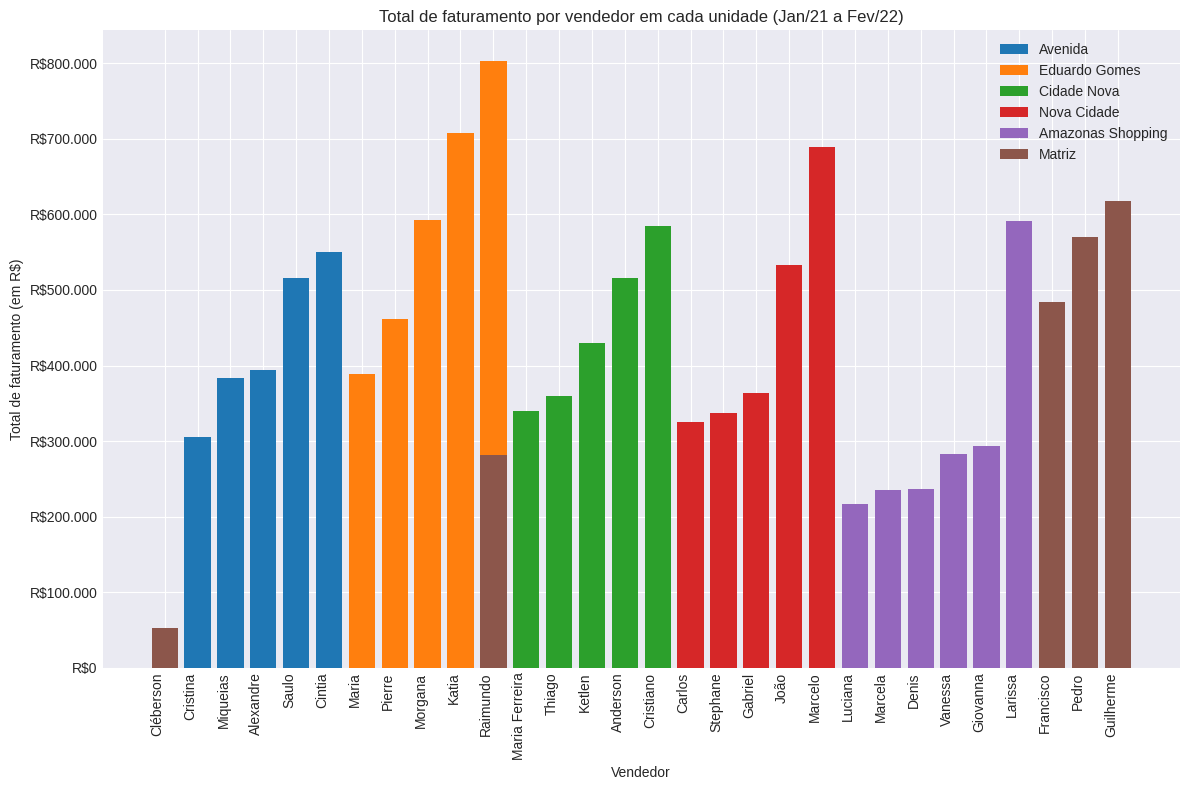

In [ ]:
melhores_vendedores_por_unidade.sort_values(by='valor_total', inplace=True)

plt.figure(figsize=(12, 8))
for unidade in melhores_vendedores_por_unidade['Unidade'].unique():
    dados_unidade = melhores_vendedores_por_unidade[melhores_vendedores_por_unidade['Unidade'] == unidade]
    plt.bar(dados_unidade['Vendedor'], dados_unidade['valor_total'], label=unidade)

# Gráfico 5
plt.xlabel('Vendedor')
plt.ylabel('Total de faturamento (em R$)')
plt.title('Total de faturamento por vendedor em cada unidade (Jan/21 a Fev/22)')
plt.legend()
plt.xticks(rotation=90, ha='right')
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(formatar_valor_monetario))
plt.tight_layout()
plt.show()


Repare nas conclusões que podemos gerar a partir do gráfico acima: O melhor vendedor, Raimundo, atuou em 2021 em duas unidades: a Matriz e Eduardo Gomes! Legal, não é?

In [ ]:
df

,Centro,Unidade,Produto,Valor unitário,Cod_vendedorr,Qtd,valor_total,Data_compra,Mes,Cod_vendedor,Vendedor
0,101.0,Avenida,Brinquedos,400.0,49590.0,17,6800.0,2021-04-25,2021-04,49590,Cintia
1,103.0,Cidade Nova,Berço,690.0,55354.0,14,9660.0,2021-03-24,2021-03,55354,Anderson
2,106.0,Avenida,Fogão,1834.0,19231.0,3,5502.0,2021-03-31,2021-03,19231,Cristina
3,104.0,Avenida,Powerbank,120.0,19231.0,5,600.0,2021-06-16,2021-06,19231,Cristina
4,104.0,Amazonas Shopping,Mi Band 6,400.0,15176.0,20,8000.0,2022-02-24,2022-02,15176,Larissa
...,...,...,...,...,...,...,...,...,...,...,...
894,102.0,Cidade Nova,Bicicleta,1200.0,55354.0,10,12000.0,2021-06-19,2021-06,55354,Anderson
895,106.0,Avenida,Bebedouro,550.0,2592.0,3,1650.0,2021-09-21,2021-09,2592,Miqueias
896,101.0,Eduardo Gomes,Mouse,47.0,11022.0,9,423.0,2021-02-27,2021-02,11022,Cléberson
897,104.0,Amazonas Shopping,Powerbank,120.0,5657.0,15,1800.0,2021-06-11,2021-06,5657,Vanessa


# O que podemos simplificar para guardar para mais tarde?
O nosso dataframe base tem 899 linhas e 11 colunas. Desde o início, criamos a coluna valor_total e incluímos as colunas Cod_vendedor e Vendedor a partir de um segundo dataframe. Como já finalizamos nossa análise em relação aos dados, podemos simplificar!

Tentemos, então, para finalizar, simplificar o dataframe, de modo que possamos usá-lo em outras oportunidades. Vamos retirar as colunas repetidas.

In [ ]:
df = df.drop(['Mes', 'Cod_vendedorr'], axis=1)
df

,Centro,Unidade,Produto,Valor unitário,Qtd,valor_total,Data_compra,Cod_vendedor,Vendedor
0,101.0,Avenida,Brinquedos,400.0,17,6800.0,2021-04-25,49590,Cintia
1,103.0,Cidade Nova,Berço,690.0,14,9660.0,2021-03-24,55354,Anderson
2,106.0,Avenida,Fogão,1834.0,3,5502.0,2021-03-31,19231,Cristina
3,104.0,Avenida,Powerbank,120.0,5,600.0,2021-06-16,19231,Cristina
4,104.0,Amazonas Shopping,Mi Band 6,400.0,20,8000.0,2022-02-24,15176,Larissa
...,...,...,...,...,...,...,...,...,...
894,102.0,Cidade Nova,Bicicleta,1200.0,10,12000.0,2021-06-19,55354,Anderson
895,106.0,Avenida,Bebedouro,550.0,3,1650.0,2021-09-21,2592,Miqueias
896,101.0,Eduardo Gomes,Mouse,47.0,9,423.0,2021-02-27,11022,Cléberson
897,104.0,Amazonas Shopping,Powerbank,120.0,15,1800.0,2021-06-11,5657,Vanessa


"Ó, amigo! Eu quero salvar esse dataframe final. Como faço?"



```
df.to_csv('df.csv', index=False)
```

Basta executar o código acima! Daí então você pode usá-lo em outros projetos!


## **RESUMO**
Façamos, então, um apanhado de cada resposta obrigatória do questionário dado pela empresa.

# 1) Qual o imposto total a ser pago pela empresa? Qual o imposto por unidade?
 O total a ser pago de impostos por cada unidade, descentralizada, é de R$ 902.533,16.

 Já o valor individual de cada imposto a ser pago por unidade de loja pode ser visto abaixo.

 Todos os valores levam em conta que o ano cívil de 2022 ainda está em aberto, não podendo, portanto, ser contabilizada, de modo que os valores relatados são referentes a 2021.

In [ ]:
imposto_descent_unid21

,Unidade,valor_total,aliquota,impostos,receita_liquida
0,Eduardo Gomes,2646363.0,0.17,449881.71,2196481.29
1,Nova Cidade,1938837.0,0.05,96941.85,1841895.15
2,Cidade Nova,1862663.0,0.05,93133.15,1769529.85
3,Avenida,1791082.0,0.05,89554.10,1701527.90
4,Matriz,1785287.0,0.05,89264.35,1696022.65
5,Amazonas Shopping,1675160.0,0.05,83758.00,1591402.00
6,Total,11699392.0,0.42,902533.16,10796858.84


# 2) Qual o produto que mais vende?

In [ ]:
produtos_mais_vendidos.head()

,Produto,Qtd
12,Jogo De Panela,498
13,Mi Band 6,491
11,Iphone,484
4,Brinquedos,474
1,Bebedouro,454


# 3) Quanto cada produto representa sobre o total de vendas da empresa?

In [ ]:
novo_df_qtd.head(3)

,Produto,valor_total,proporcao
11,Iphone,3630000.0,0.267755
9,Geladeira,1289088.0,0.095085
23,Xbox Series S,854000.0,0.062993


# 4) Qual o lucro de cada loja após os descontos de imposto?

Mais uma vez, por questões já supracitadas, o ano cívil referente é de 2021, cabe ressaltar. Portanto, a coluna de receita líquida responde a pergunta dada pela empresa.

In [ ]:
imposto_descent_unid21

,Unidade,valor_total,aliquota,impostos,receita_liquida
0,Eduardo Gomes,2646363.0,0.17,449881.71,2196481.29
1,Nova Cidade,1938837.0,0.05,96941.85,1841895.15
2,Cidade Nova,1862663.0,0.05,93133.15,1769529.85
3,Avenida,1791082.0,0.05,89554.10,1701527.90
4,Matriz,1785287.0,0.05,89264.35,1696022.65
5,Amazonas Shopping,1675160.0,0.05,83758.00,1591402.00
6,Total,11699392.0,0.42,902533.16,10796858.84


# 5) Qual período que cada loja mais vendeu em R$ e qual o valor?
Há, neste relatório, tanto o dia quanto o mês em que cada loja mais faturou. Abaixo, há relação por mês.

In [ ]:
mes_unidade_mais_vendas

,Mes,Unidade,valor_total
63,2021-11,Eduardo Gomes,444556.0
12,2021-03,Amazonas Shopping,371271.0
8,2021-02,Cidade Nova,348218.0
25,2021-05,Avenida,340133.0
29,2021-05,Nova Cidade,287775.0
16,2021-03,Matriz,262073.0


Pronto! Terminamos! Foi uma honra guiar-lhes em meio a essa jornada de tratamento, análise e visualização de dados de comércio em varejo da BEMOL com o Python.

Até a próxima!

Por [Vitor Vieira](https://www.linkedin.com/in/vitor-vieira-832468220/)